In [14]:
import os
import pandas as pd
import numpy as np

dense_summary_path = os.path.join("210503_dense", "210503_dense.csv")
LSwFW_summary_path = os.path.join("210503_LSwFW", "210503_LSwFW.csv")
LS_summary_path = os.path.join("210504_LS", "210504_LS.csv")
LSwFW_ones_summary_path = os.path.join(
    "210616_LSwFW_ones", "210616_LSwFW_ones.csv")
xgboost_summary_path = os.path.join(
    "210616_xgboost", "210616_xgboost.csv"
)
RF_summary_path = os.path.join(
    "210616_RF", "210616_RF.csv"
)
summary_df = pd.read_csv(dense_summary_path)
summary_df = pd.concat([summary_df, pd.read_csv(LSwFW_summary_path)])
summary_df = pd.concat([
    pd.read_csv(dense_summary_path),
    pd.read_csv(LS_summary_path), 
    pd.read_csv(LSwFW_summary_path),
    pd.read_csv(LSwFW_ones_summary_path),
    pd.read_csv(xgboost_summary_path), 
    pd.read_csv(RF_summary_path)
])

In [15]:
summary_df

,Model,n_noise_dim,Metric,Split,Score
0,dense,1,AUC,Train,0.926257
1,dense,1,acc,Train,0.798889
2,dense,1,AUC,Test,0.874725
3,dense,1,acc,Test,0.680000
4,dense,2,AUC,Train,0.956989
...,...,...,...,...,...
27,RF,7,acc,Test,0.710000
28,RF,8,AUC,Train,1.000000
29,RF,8,acc,Train,1.000000
30,RF,8,AUC,Test,0.730330


In [16]:
plot_df=summary_df.query("Metric=='AUC' & Split=='Test'")
plot_df['n_noise_dim'] = plot_df['n_noise_dim']/10.

<ipython-input-16-6ad9eb5d74ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['n_noise_dim'] = plot_df['n_noise_dim']/10.


In [17]:
summary_df.query("Metric=='AUC' & Split=='Train'")

,Model,n_noise_dim,Metric,Split,Score
0,dense,1,AUC,Train,0.926257
4,dense,2,AUC,Train,0.956989
8,dense,3,AUC,Train,0.975729
12,dense,4,AUC,Train,0.984217
16,dense,5,AUC,Train,0.954274
20,dense,6,AUC,Train,0.987648
24,dense,7,AUC,Train,0.993669
28,dense,8,AUC,Train,0.686159
0,LS,1,AUC,Train,0.902065
4,LS,2,AUC,Train,0.945786


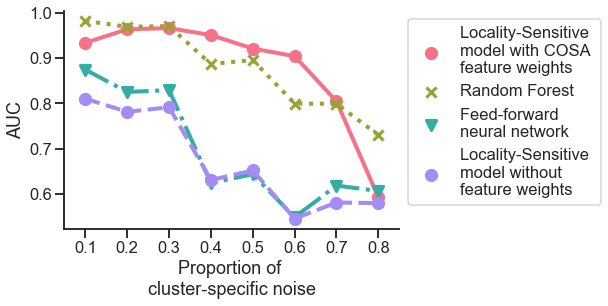

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# plt.figure(figsize=(9, 5))
sns.set_theme(context="talk", style="ticks", palette="Set2")
sns.set_context("talk")
sns.set_style("ticks")
g = sns.pointplot(data=plot_df,
                  x="n_noise_dim",
                  y="Score",
                  hue="Model",
                  hue_order=["LSwFW", #"LSwFW_ones", 
#                              "xgboost", 
                             "RF", 
                             "dense", "LS"],
                  linestyles=["-", ":", "-.","--","--"],
                  markers=["o", "x", "v","o","o"],
                  palette="husl",
                  #                    ax=ax,
                  )
h, l = g.get_legend_handles_labels()
leg_labels = ["Locality-Sensitive \nmodel with COSA \nfeature weights",
             # "Locality-Sensitive \nmodel with naive \nfeature weights",
#               "XGBoost",
              "Random Forest",
              "Feed-forward \nneural network",
              "Locality-Sensitive \nmodel without \nfeature weights",

              ]
g.legend(handles=h,
         labels=leg_labels,
         bbox_to_anchor=(1, 1))
g.set_ylabel("AUC")
g.set_xlabel("Proportion of \ncluster-specific noise")
sns.despine()

plt.show()

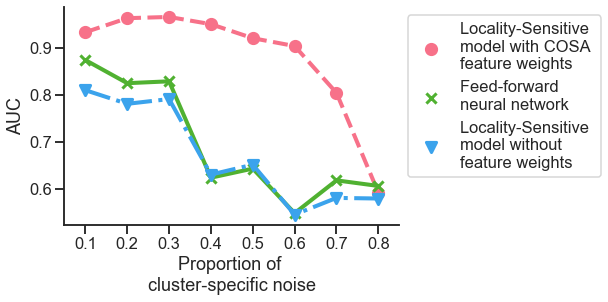

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# plt.figure(figsize=(9, 5))
sns.set_theme(context="talk", style="ticks", palette="Set2")
sns.set_context("talk")
sns.set_style("ticks")
g = sns.pointplot(data=plot_df,
                  x="n_noise_dim",
                  y="Score",
                  hue="Model",
                  hue_order=["LSwFW", "dense", "LS"],
                  linestyles=["--", "-", "-."],
                  markers=["o", "x", "v"],
                  palette="husl",
                  #                    ax=ax,
                  )
h, l = g.get_legend_handles_labels()
leg_labels = ["Locality-Sensitive \nmodel with COSA \nfeature weights",
              "Feed-forward \nneural network",
              "Locality-Sensitive \nmodel without \nfeature weights",

              ]
g.legend(handles=h,
         labels=leg_labels,
         bbox_to_anchor=(1, 1))
g.set_ylabel("AUC")
g.set_xlabel("Proportion of \ncluster-specific noise")
sns.despine()

plt.show()

In [108]:
leg = g.legend()

In [109]:
leg